# Graficas 

nombres 
descripción...

In [2]:
## Analisis de datos - Librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
dim_customer = pd.read_csv('dim_customer.csv')
dim_date = pd.read_csv('dim_date.csv')
dim_payment_method = pd.read_csv('dim_payment_method.csv')
dim_product = pd.read_csv('dim_product.csv')
dim_shopping_mall = pd.read_csv('dim_shopping_mall.csv')
invoice = pd.read_csv('invoice.csv')
dim_customer

,customer_id,gender,age,name
0,C241288,Female,28,NaN
1,C111565,Male,21,NaN
2,C266599,Male,20,NaN
3,C988172,Female,66,NaN
4,C189076,Female,53,NaN
...,...,...,...,...
99452,C441542,Female,45,NaN
99453,C569580,Male,27,NaN
99454,C103292,Male,63,NaN
99455,C800631,Male,56,NaN


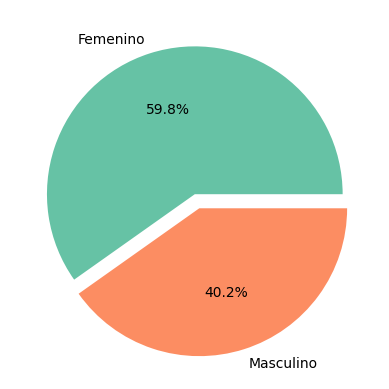

In [4]:
plt.figure()

# distribucion de genero de los clientes en grafico de barras

# sns.countplot(x='gender', data=dim_customer, palette='Set2', hue='gender')

# ahora con un grafico de pastel
colors = sns.color_palette('Set2')

plt.pie(dim_customer.gender.value_counts(), labels=['Femenino', 'Masculino'], autopct='%.1f%%', colors=colors, explode=(0, 0.1))
plt.show()

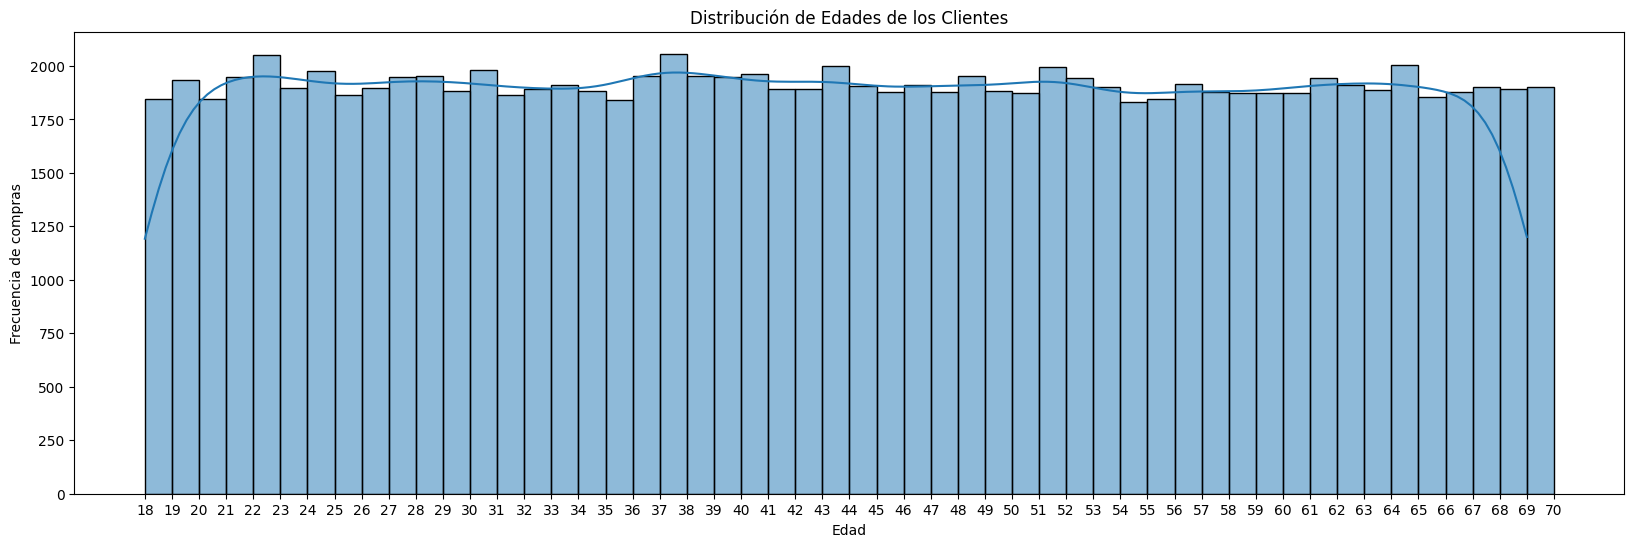

In [5]:
plt.figure(figsize=(20, 6))


# grafico de cantidad de consumidores por rango de edad
# sns.histplot(dim_customer.age, bins=7, color=colors[0], kde=True)

# sns.histplot(dim_customer.age, bins=[0, 18, 30, 40, 50, 60, 70, 80], kde=True)

# sns.histplot(dim_customer["age"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], kde=True)
sns.histplot(dim_customer.age, bins=range(18,71), kde=True)
plt.xticks(range(18, 71, 1)) 
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compras")
plt.title("Distribución de Edades de los Clientes")
plt.show()

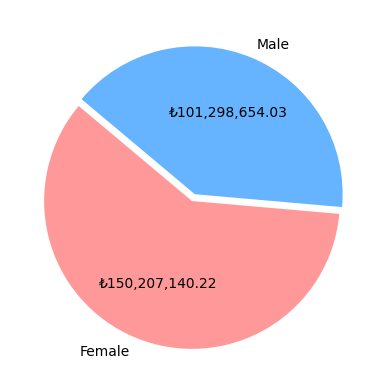

In [6]:
data = invoice.merge(dim_customer[['customer_id', 'gender']], how='inner', on='customer_id')
# data.groupby('age').count().sort_values('invoice_id', ascending=False).head(1)

# sns.boxplot(x="gender", y="total_price", data=data, hue="gender", palette="Set2")


plt.figure()


# Crear el gráfico de torta
# plt.pie(gasto_por_genero, labels=gasto_por_genero.index, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"], startangle=140, explode=[0.05, 0])

gasto_por_genero = data.groupby("gender")["total_price"].sum()

def format_monetary(value):
    
    return f"₺{value:,.2f}"  # Agrega comas cada tres dígitos y dos decimales

# Crear el gráfico de torta
plt.pie(
    gasto_por_genero, 
    labels=gasto_por_genero.index, 
    autopct=lambda p: format_monetary(p * gasto_por_genero.sum() / 100),  # Aplica el formato monetario
    colors=["#ff9999", "#66b3ff"], 
    startangle=140, 
    explode=[0.05, 0]
)

plt.show()


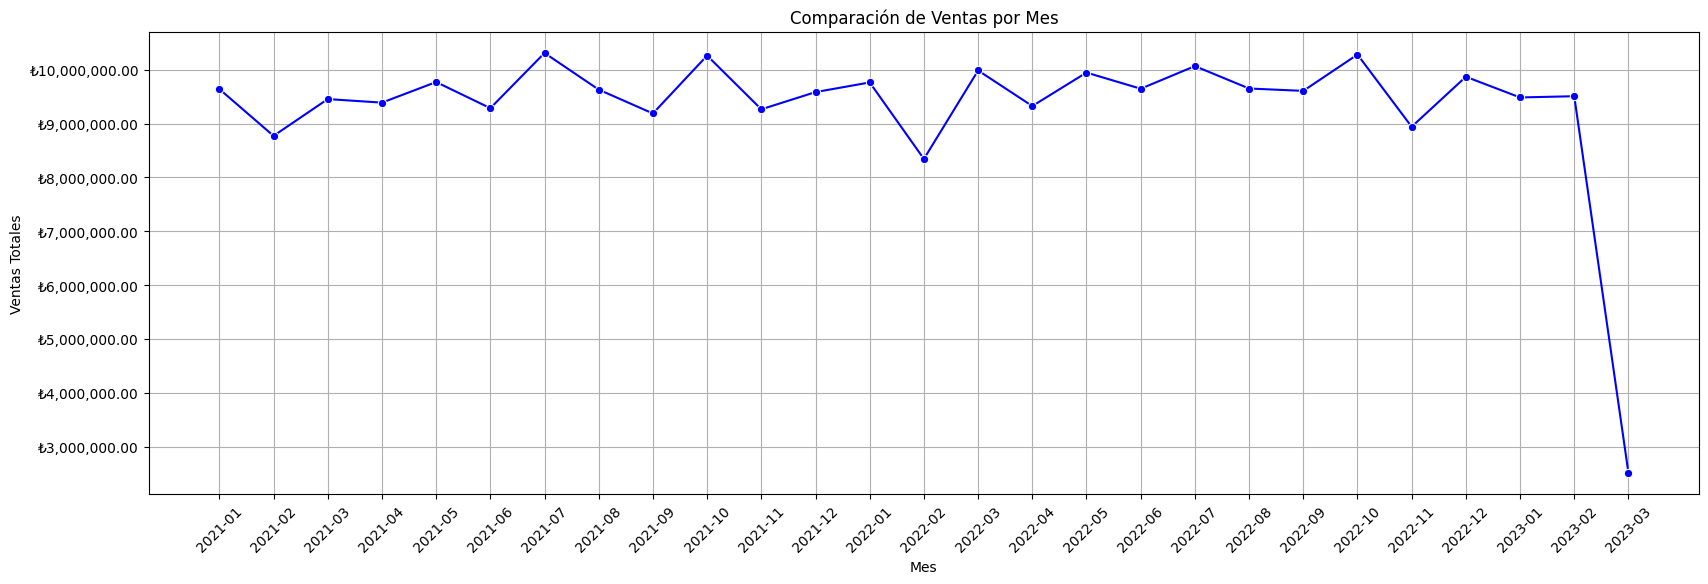

In [7]:
import matplotlib.ticker as mtick
data_with_datetime =  pd.read_csv('df_star.csv')


# Convertir invoice_date a datetime
data_with_datetime["invoice_date"] = pd.to_datetime(data_with_datetime["invoice_date"])

# Extraer año y mes
data_with_datetime["year_month"] = data_with_datetime["invoice_date"].dt.to_period("M")  # Formato YYYY-MM

# Agrupar por mes y calcular ventas totales
ventas_mensuales = data_with_datetime.groupby("year_month")["total_price"].sum().reset_index()

# Convertir a string para evitar problemas en el eje X
ventas_mensuales["year_month"] = ventas_mensuales["year_month"].astype(str)

# Configurar el gráfico
plt.figure(figsize=(20, 6))
sns.lineplot(data=ventas_mensuales, x="year_month", y="total_price", marker="o", color="b")

formatter = mtick.FuncFormatter(lambda x, _: f'₺{x:,.2f}')  # Formato $10,000.00
plt.gca().yaxis.set_major_formatter(formatter)

# Mejorar visualización
plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Ventas Totales")
plt.title("Comparación de Ventas por Mes")
plt.grid(True)

# Mostrar gráfico
plt.show()

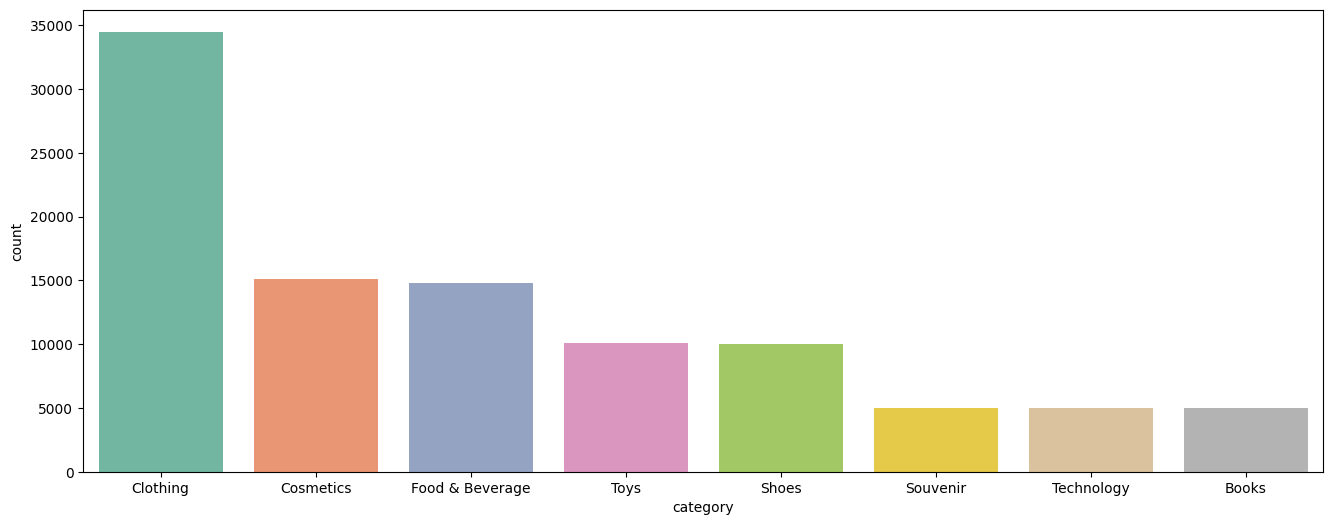

In [ ]:
data_for_category_group = invoice.merge(dim_product[['product_id', 'category']], how='left', on='product_id').drop(columns=invoice.columns)

# data_for_category_group.groupby('category').count()

# Contar la cantidad de datos por categoría
category_counts = data_for_category_group['category'].value_counts().to_frame()
# Convertir la Series en DataFrame con reset_index()
df_category_counts = category_counts.reset_index()

# Renombrar las columnas para mayor claridad
df_category_counts.columns = ['category', 'count']
df_category_counts

plt.figure(figsize=(16,6))

sns.barplot(x="category", y="count", data=df_category_counts, palette="Set2", hue="category")

plt.show()

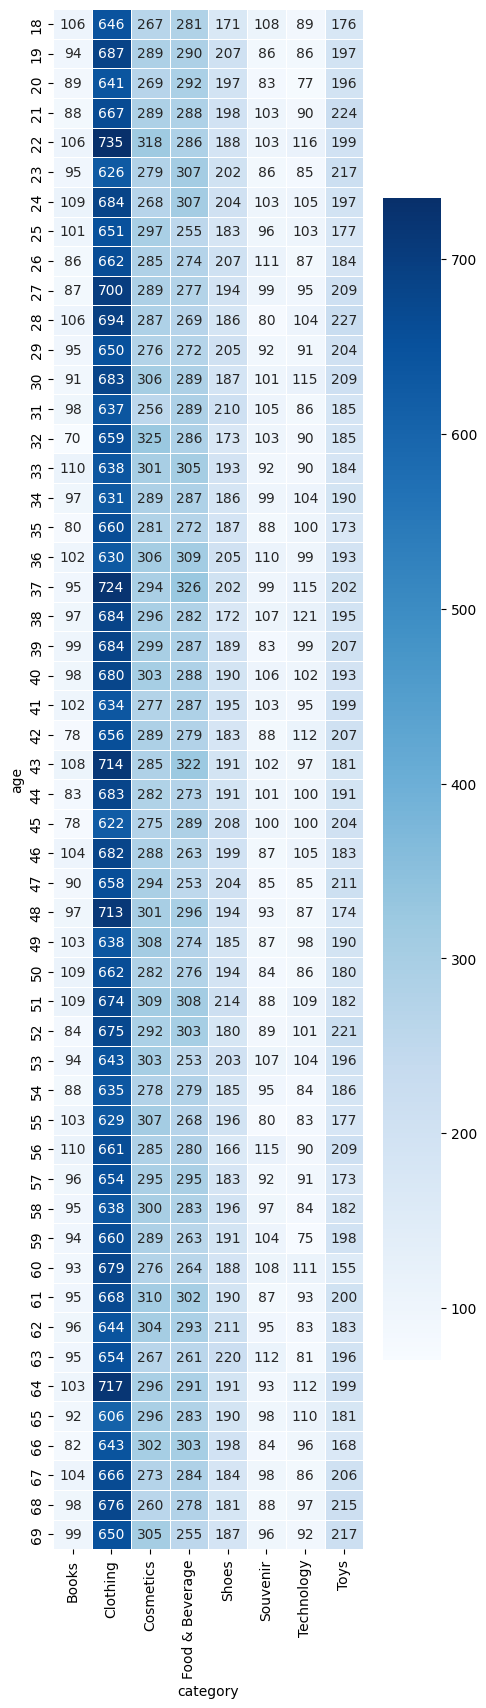

In [21]:
# Mapa de calor, vizualizar la relación entre edad y categoria de producto
# merge de customer, product
data = invoice.merge(dim_customer[['customer_id', 'age']], how='left', on='customer_id').merge(dim_product[['product_id', 'category']], how='left', on='product_id')

plt.figure(figsize=(5, 20))
# Agrupar los datos: contar compras por combinación de edad y categoría
heatmap_data = data.pivot_table(index='age', columns='category', values='invoice_id', aggfunc='count')

# Configurar el tamaño del gráfico

# Crear el heatmap
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.show()

c:\Users\Victor\Desktop\pandas\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


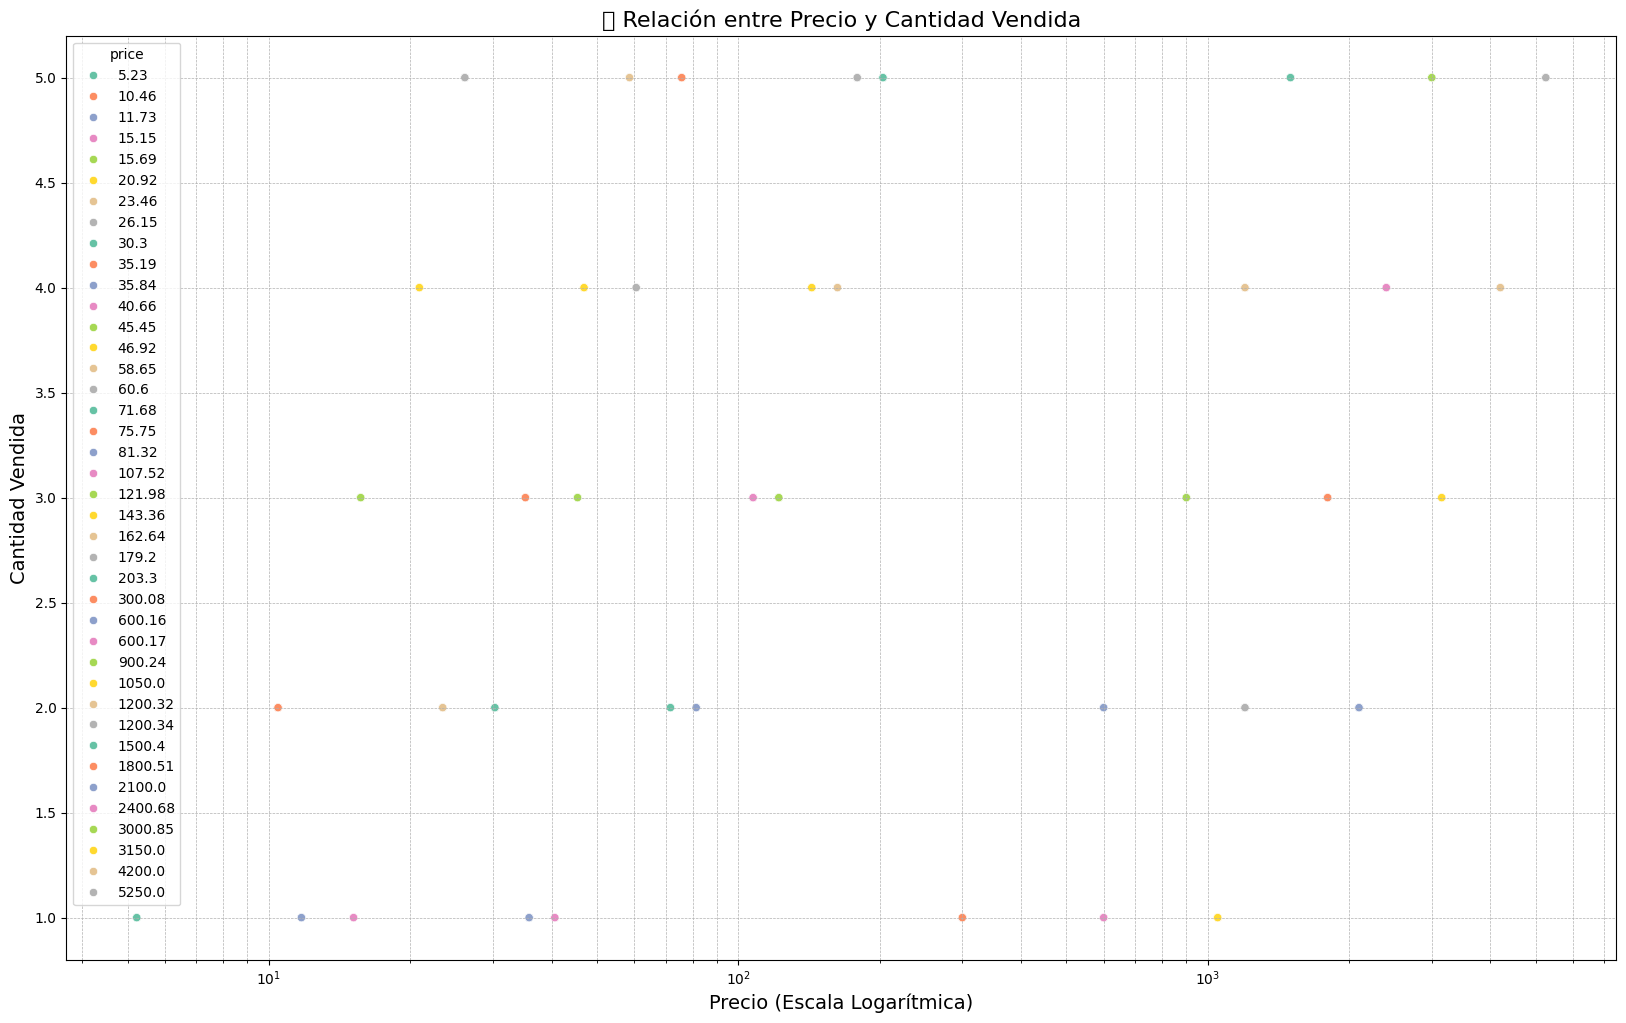

In [45]:
# Relacion entre precio unitario y cantidad comprada

data = invoice.merge(dim_product[['product_id', 'price']], how='left', on='product_id')

plt.figure(figsize=(20, 12))

# Crear el scatterplot
ax = sns.scatterplot(x='price', y='quantity', data=data, hue='price', palette='Set2')

# Aplicar escala logarítmica al eje X
plt.xscale("log")

# Ajustes adicionales
plt.xlabel("Precio (Escala Logarítmica)", fontsize=14)
plt.ylabel("Cantidad Vendida", fontsize=14)
plt.title("📈 Relación entre Precio y Cantidad Vendida", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Agregar una cuadrícula suave
plt.show()


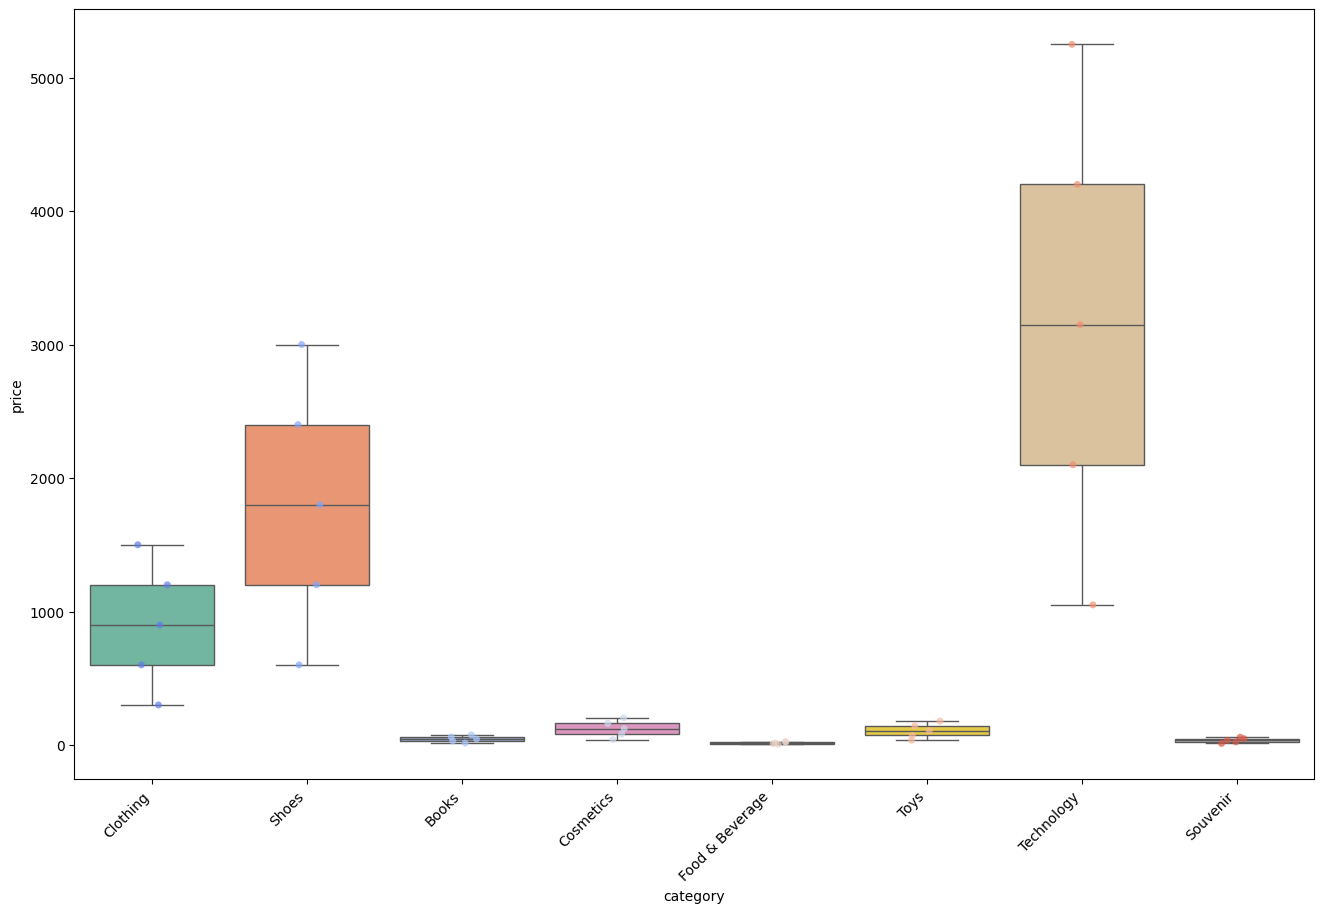

In [58]:
# Analizar la distribuicion de precios por categoria de producto
# Crear el boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(x="category", y="price", data=dim_product, hue="category", palette="Set2")
sns.stripplot(x="category", y="price", data=dim_product, hue="category", palette="coolwarm", alpha=0.7)

# Rotar las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45, ha='right')
plt.show()

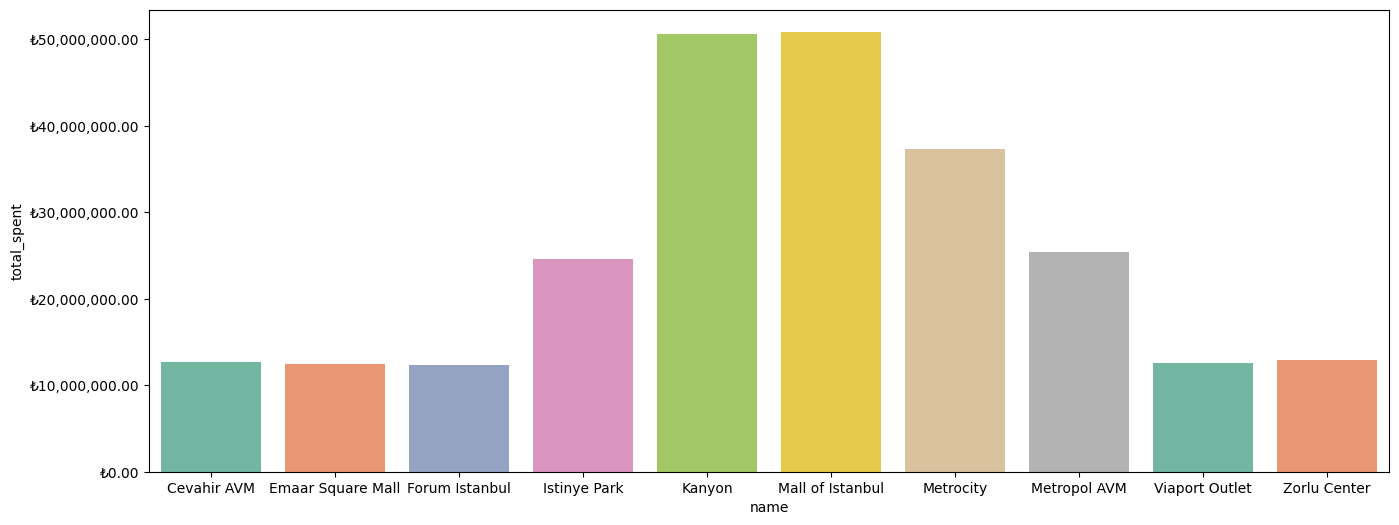

In [83]:
dim_shopping_mall
data = invoice.merge(dim_shopping_mall[['shopping_mall_id', 'name']], how='left', on='shopping_mall_id')
data


# Agrupar por centro comercial y sumar los total_price
shopping_mall_sales = data.groupby('name', as_index=False)['total_price'].sum()

# Renombrar la columna para mayor claridad
shopping_mall_sales.rename(columns={'total_price': 'total_spent'}, inplace=True)
shopping_mall_sales
# gasto total por  centro comercial en violin


plt.figure(figsize=(16, 6))
sns.barplot(x="name", y="total_spent", data=shopping_mall_sales, palette="Set2", hue="name")
formatter = mtick.FuncFormatter(lambda x, _: f'₺{x:,.2f}')  # Formato $10,000.00
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# plt.figure(figsize=(16, 10))

# # Crear el violinplot
# sns.violinplot(x="name", y="total_spent", data=shopping_mall_sales, palette="Set2", hue="name")

# # Rotar las etiquetas del eje X para mejor visualización
# plt.show()

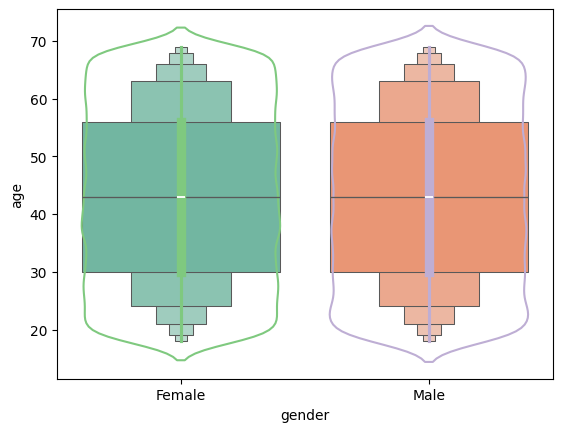

In [96]:
# distribución de edades por genero
plt.figure()

sns.boxenplot(y="age", x="gender", data=dim_customer, palette="Set2", hue="gender")
sns.violinplot(y="age", x="gender", data=dim_customer, palette="Accent", hue="gender", fill=False)
plt.show()

,customer_id,gender,age,name
0,C241288,Female,28,NaN
1,C111565,Male,21,NaN
2,C266599,Male,20,NaN
3,C988172,Female,66,NaN
4,C189076,Female,53,NaN
...,...,...,...,...
99452,C441542,Female,45,NaN
99453,C569580,Male,27,NaN
99454,C103292,Male,63,NaN
99455,C800631,Male,56,NaN
